# Deep Learning to predict housing price

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv('kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [3]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

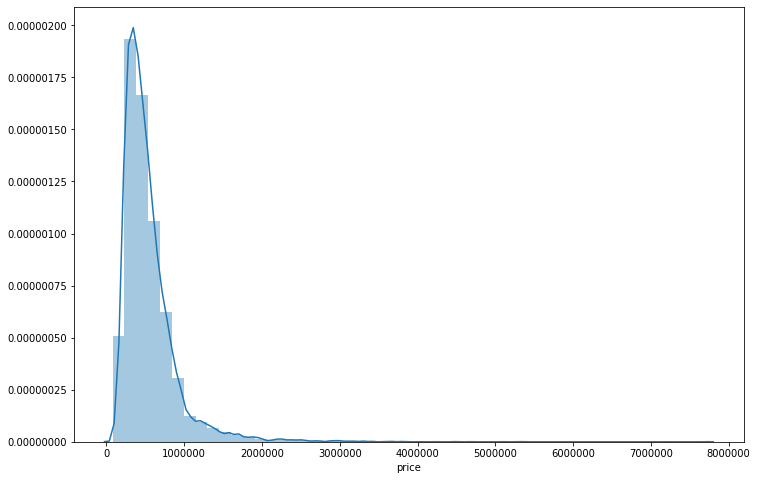

In [27]:
#PRICE distribution
plt.figure(figsize=(12,8))
sns.distplot(df['price'])

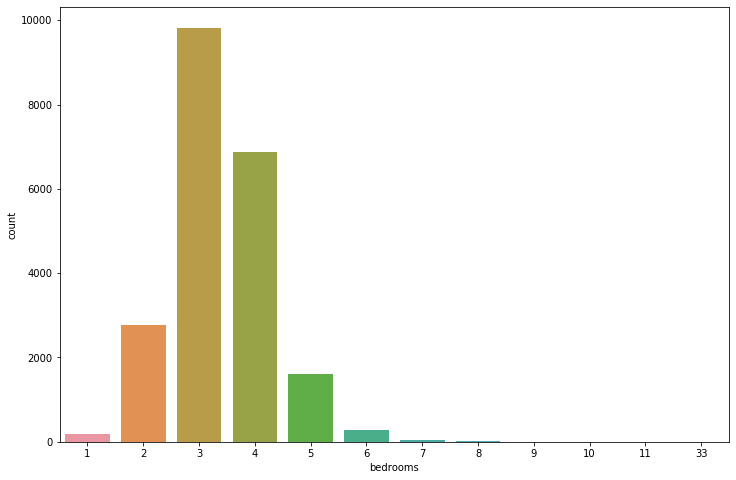

In [28]:
# bed room counts
plt.figure(figsize=(12,8))
sns.countplot(df['bedrooms'])

In [6]:
#which variable is most related to price?
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

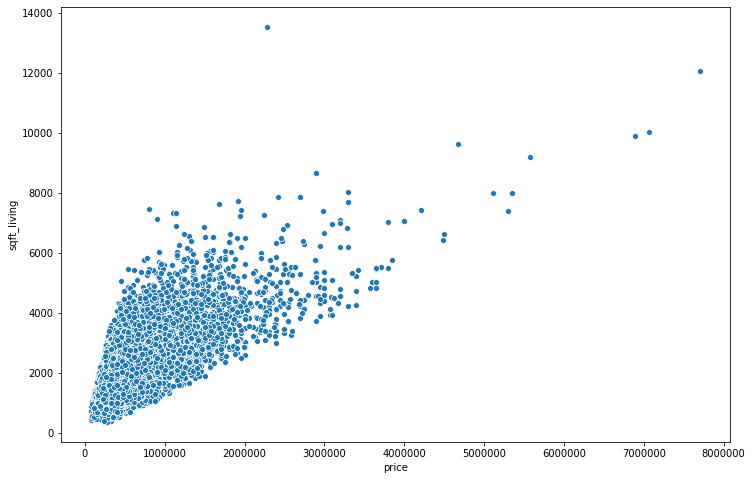

In [7]:
#living sqft and price is most associated!
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='sqft_living',data=df)

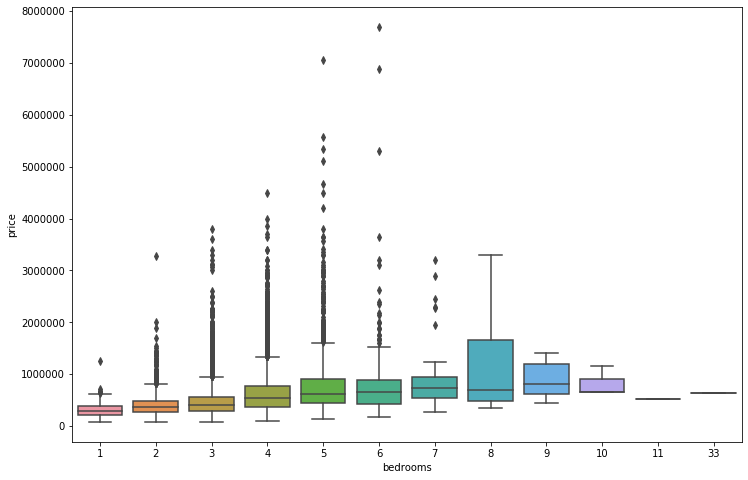

In [8]:
#does #bedroom impact price? 
plt.figure(figsize=(12,8))
sns.boxplot(x='bedrooms',y='price',data=df)

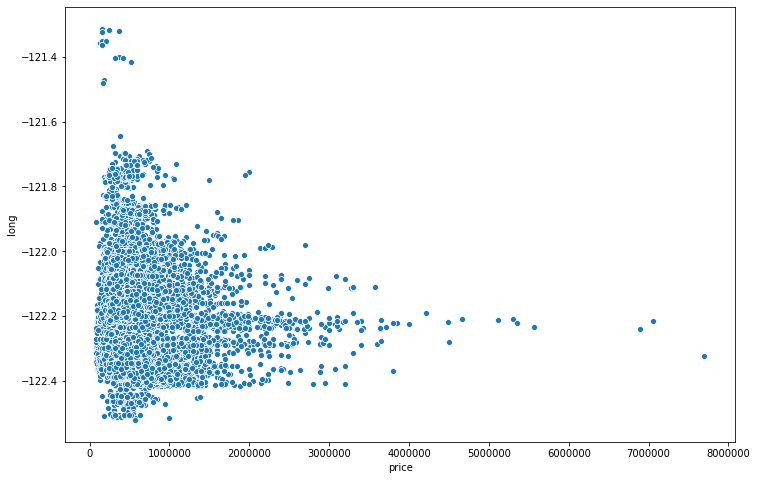

In [9]:
#is longtitude impact price?

plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='long',data=df)

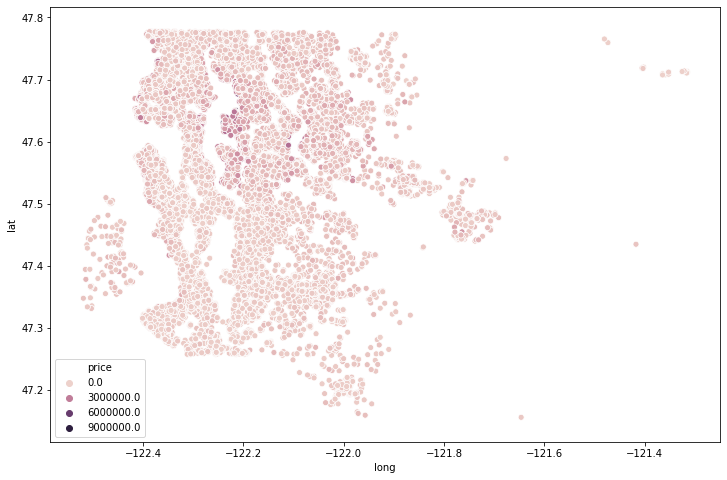

In [10]:
# how does house price distributed on map?

plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',hue='price',data=df)

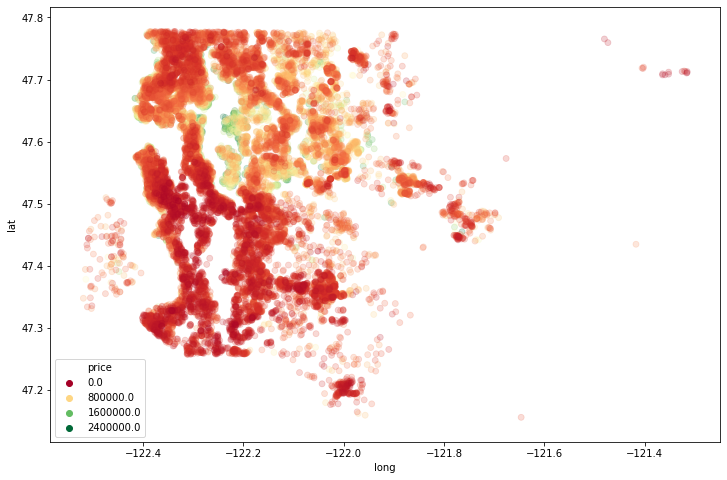

In [13]:
#now we romove the most expensive house to get a better price virtualization on map

plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',hue='price',edgecolor=None,alpha=0.2,palette='RdYlGn',data=nontop)

In [30]:
# make year/month predictable

df['date'] = pd.to_datetime(df['date'])
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month

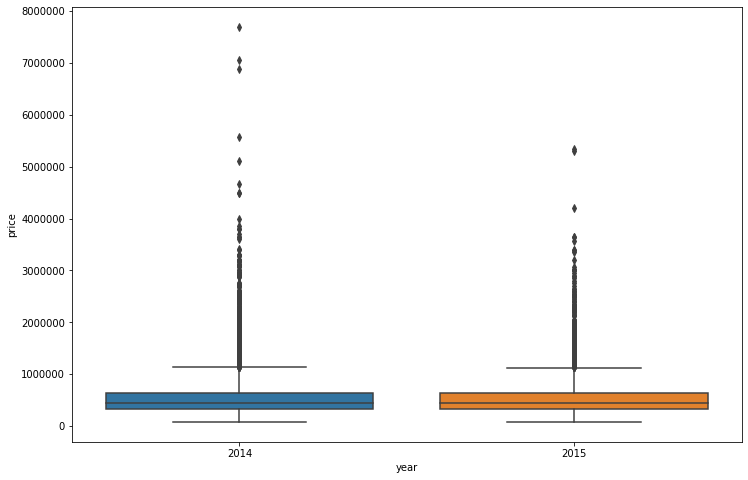

In [20]:
#is year data making senese? 

plt.figure(figsize=(12,8))
sns.boxplot(x='year',y='price',data=df)

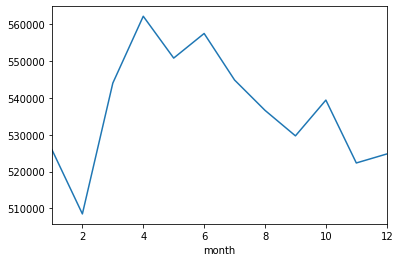

In [21]:
#is month data making senese? 

df.groupby('month').mean()['price'].plot()

In [32]:
#drop unrelated string columns

df.drop('date',axis=1,inplace=True)
df.drop('zipcode',axis=1,inplace=True)
df = df.drop('id',axis=1)

In [33]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month'],
      dtype='object')

In [34]:
#split dataset

from sklearn.model_selection import train_test_split
X = df.drop('price',axis = 1).values
y=df['price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
#scale dataset

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
#use tensorflow to train datasets

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [48]:
model = Sequential()

model.add(Dense(19,activation='relu'))

model.add(Dense(19,activation='relu'))

model.add(Dense(19,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(19,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [49]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [50]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),epochs=400,callbacks=[early_stop])

Epoch 1/400
473/473 [==============================] - 1s 1ms/step - loss: 408393220096.0000 - val_loss: 277729705984.0000
Epoch 2/400
473/473 [==============================] - 0s 992us/step - loss: 184437194752.0000 - val_loss: 111903653888.0000
Epoch 3/400
473/473 [==============================] - 0s 991us/step - loss: 168716173312.0000 - val_loss: 108868812800.0000
Epoch 4/400
473/473 [==============================] - 0s 998us/step - loss: 161549172736.0000 - val_loss: 100918517760.0000
Epoch 5/400
473/473 [==============================] - 0s 1ms/step - loss: 154738769920.0000 - val_loss: 94674624512.0000
Epoch 6/400
473/473 [==============================] - 0s 970us/step - loss: 154253213696.0000 - val_loss: 93539393536.0000
Epoch 7/400
473/473 [==============================] - 0s 1ms/step - loss: 145615716352.0000 - val_loss: 88963448832.0000
Epoch 8/400
473/473 [==============================] - 0s 981us/step - loss: 143091417088.0000 - val_loss: 83975561216.0000
Epoch 9/40

473/473 [==============================] - 0s 988us/step - loss: 103568162816.0000 - val_loss: 48109408256.0000
Epoch 68/400
473/473 [==============================] - 0s 906us/step - loss: 105364471808.0000 - val_loss: 49469575168.0000
Epoch 69/400
473/473 [==============================] - 0s 925us/step - loss: 103565320192.0000 - val_loss: 49661677568.0000
Epoch 70/400
473/473 [==============================] - 0s 908us/step - loss: 102322774016.0000 - val_loss: 48341532672.0000
Epoch 71/400
473/473 [==============================] - 0s 901us/step - loss: 102359121920.0000 - val_loss: 46704865280.0000
Epoch 72/400
473/473 [==============================] - 0s 1ms/step - loss: 103822131200.0000 - val_loss: 47571488768.0000
Epoch 73/400
473/473 [==============================] - 1s 1ms/step - loss: 100857683968.0000 - val_loss: 48660140032.0000
Epoch 74/400
473/473 [==============================] - 0s 938us/step - loss: 105037307904.0000 - val_loss: 47980040192.0000
Epoch 75/400
473/

Epoch 133/400
473/473 [==============================] - 0s 907us/step - loss: 99365814272.0000 - val_loss: 45505978368.0000
Epoch 134/400
473/473 [==============================] - 0s 924us/step - loss: 95292358656.0000 - val_loss: 41940697088.0000
Epoch 135/400
473/473 [==============================] - 0s 898us/step - loss: 102689898496.0000 - val_loss: 47266897920.0000
Epoch 136/400
473/473 [==============================] - 0s 911us/step - loss: 96598941696.0000 - val_loss: 46337372160.0000
Epoch 137/400
473/473 [==============================] - 0s 923us/step - loss: 100217880576.0000 - val_loss: 45078994944.0000
Epoch 138/400
473/473 [==============================] - 0s 912us/step - loss: 99334324224.0000 - val_loss: 44290904064.0000
Epoch 139/400
473/473 [==============================] - 0s 910us/step - loss: 98109022208.0000 - val_loss: 41636962304.0000
Epoch 140/400
473/473 [==============================] - 0s 926us/step - loss: 102714834944.0000 - val_loss: 45330210816.00

473/473 [==============================] - 0s 920us/step - loss: 92268535808.0000 - val_loss: 41704681472.0000
Epoch 199/400
473/473 [==============================] - 0s 909us/step - loss: 98072543232.0000 - val_loss: 41499181056.0000
Epoch 200/400
473/473 [==============================] - 0s 938us/step - loss: 99746209792.0000 - val_loss: 42763538432.0000
Epoch 201/400
473/473 [==============================] - 0s 928us/step - loss: 95052709888.0000 - val_loss: 39941185536.0000
Epoch 00201: early stopping


<Figure size 864x576 with 0 Axes>

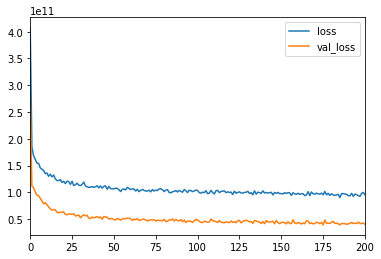

In [51]:
plt.figure(figsize=(12,8))
pd.DataFrame(model.history.history).plot()

In [44]:
#check how our model perform

from sklearn.metrics import mean_absolute_error,mean_squared_error

In [52]:
pred = model.predict(X_test)

In [53]:
np.sqrt(mean_squared_error(pred,y_test))

199852.93888095807

In [54]:
mean_absolute_error(pred,y_test)

121179.3675045814

In [ ]:
df['price'].describe()

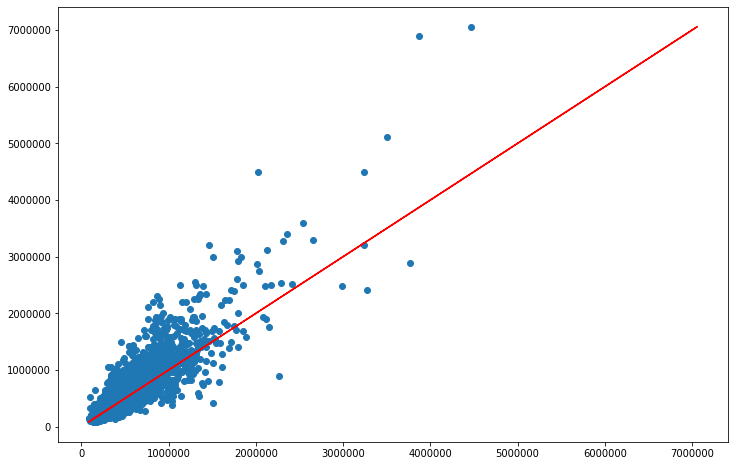

In [55]:
plt.figure(figsize=(12,8))
plt.scatter(pred,y_test)
plt.plot(y_test,y_test,color='r')